In [1]:
#loading basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
df_cleaned = pd.read_csv('../data/cleaned_dataset.csv',index_col=0)
df_cleaned.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day_of_week,month
0,1452531600000000000,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,...,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,17,0,1
1,1452532200000000000,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,17,0,1
2,1452532800000000000,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,17,0,1
3,1452533400000000000,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,...,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,17,0,1
4,1452534000000000000,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,17,0,1


In [3]:
df_cleaned.shape

(16857, 32)

In [4]:
df_cleaned.isnull().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour          

In [5]:
# Create aggregate zone features 
zone_temp_cols = [col for col in df_cleaned.columns if 'zone' in col and 'temperature' in col]
zone_humid_cols = [col for col in df_cleaned.columns if 'zone' in col and 'humidity' in col]


In [6]:
# Average temperature and humidity across zones
df_cleaned['avg_zone_temperature'] = df_cleaned[zone_temp_cols].mean(axis=1)
df_cleaned['avg_zone_humidity'] = df_cleaned[zone_humid_cols].mean(axis=1)

In [7]:
# Drop timestamp if not needed because we have already extracted useful features from it
df_cleaned = df_cleaned.drop('timestamp',axis=1)

In [8]:
df_cleaned.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day_of_week,month,avg_zone_temperature,avg_zone_humidity
0,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,17,0,1,18.622216,50.207407
1,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,17,0,1,17.149630,50.012778
2,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,17,0,1,19.201238,50.628889
3,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,17,0,1,18.762216,55.663222
4,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,17,0,1,15.679242,50.732963


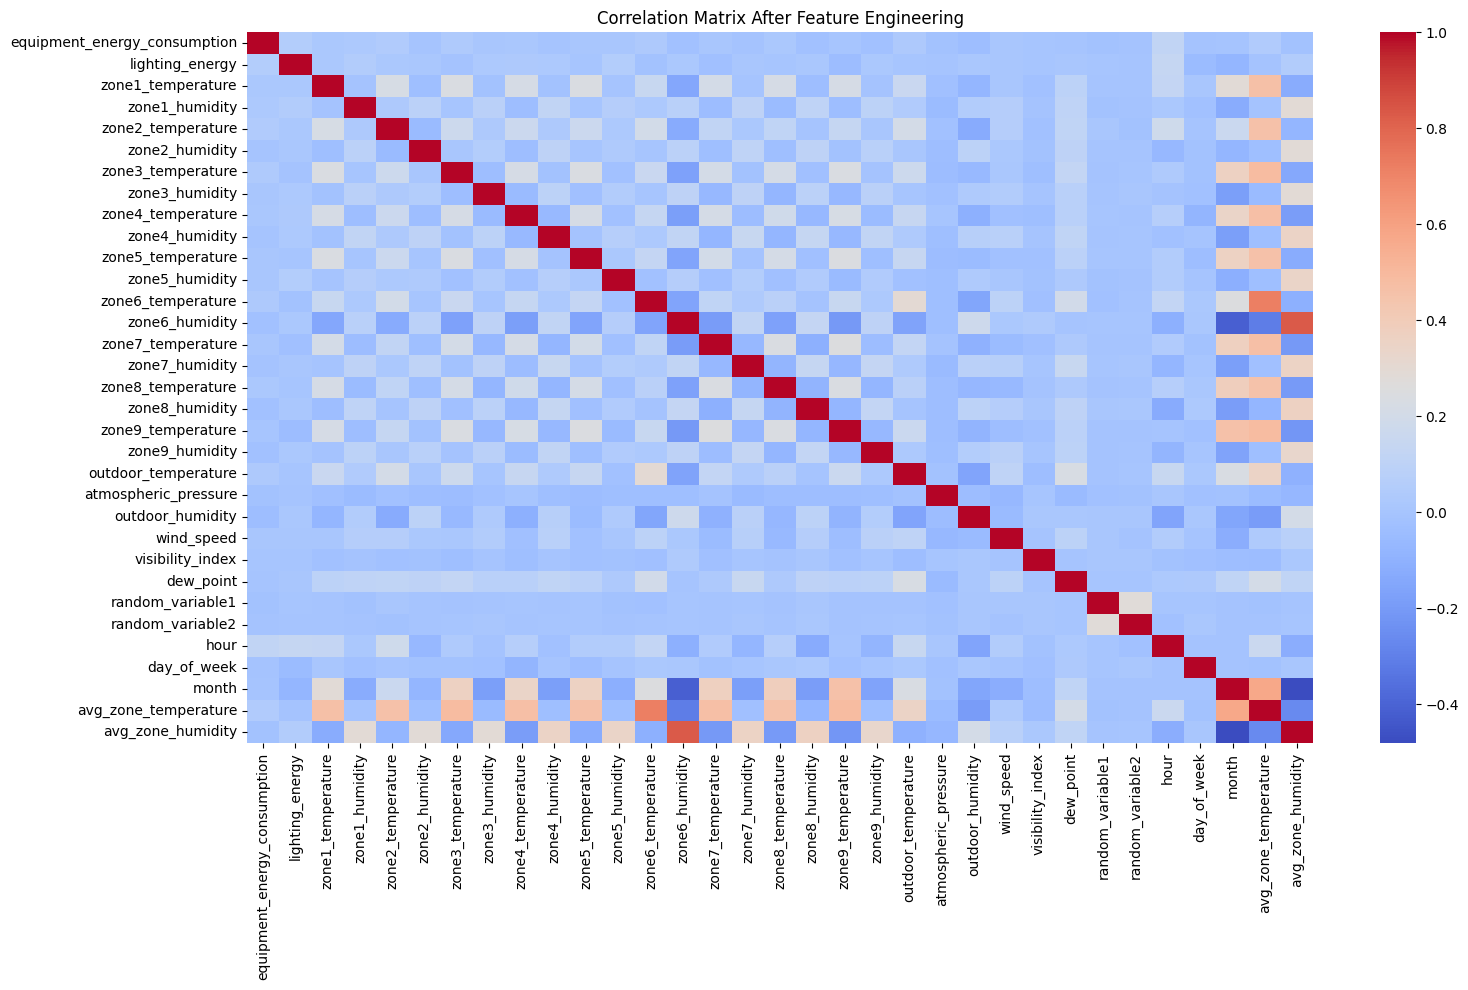

In [9]:
# Re-checking correlation to find strong predictors
plt.figure(figsize=(16, 10))
sns.heatmap(df_cleaned.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix After Feature Engineering')
plt.tight_layout()
plt.show()

In [10]:
#Based on the correaltion matrix,random_varaible1 and random_variable2 have very low correlation
#Dropping these two features
df_cleaned=df_cleaned.drop(['random_variable1','random_variable2'],axis=1)

In [12]:
df_cleaned.columns

Index(['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
       'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone5_humidity',
       'zone6_temperature', 'zone6_humidity', 'zone7_temperature',
       'zone7_humidity', 'zone8_temperature', 'zone8_humidity',
       'zone9_temperature', 'zone9_humidity', 'outdoor_temperature',
       'atmospheric_pressure', 'outdoor_humidity', 'wind_speed',
       'visibility_index', 'dew_point', 'hour', 'day_of_week', 'month',
       'avg_zone_temperature', 'avg_zone_humidity'],
      dtype='object')

#Model Training

In [13]:
#splittingt the dataset into dependent and independent features
X = df_cleaned.drop(columns=['equipment_energy_consumption'])
y = df_cleaned['equipment_energy_consumption']

In [15]:
#Model selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13485, 30), (3372, 30), (13485,), (3372,))

In [19]:
#Training the model with linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

[125.66201265 141.37458675 113.44801106 ...  72.11238575 129.49288297
  77.40513299]


In [20]:
#Now creating evaluation_matrix function to check score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    print(f"MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²   : {r2_score(y_true, y_pred):.4f}")

In [21]:
print("Linear Regression Performance:")
evaluate_model(y_test, y_pred_lr)

Linear Regression Performance:
MAE  : 74.35
RMSE : 178.09
R²   : 0.0171


In [22]:
#Now training with Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
evaluate_model(y_test, y_pred_rf)

Random Forest Performance:
MAE  : 72.00
RMSE : 174.36
R²   : 0.0579


In [25]:
#Now trying with XGBoost regressor
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb)

XGBoost Performance:
MAE  : 73.25
RMSE : 176.93
R²   : 0.0298


#Based on these 3 model.Random forest is performing best so i will hyperparameter tune it.

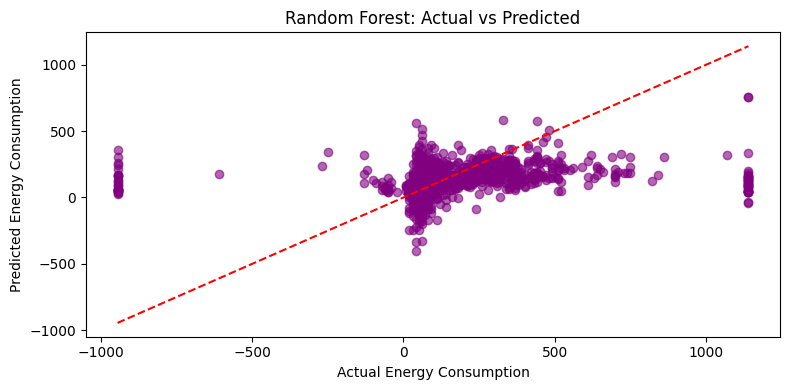

In [26]:
#Resudial analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='purple')
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

In [27]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create GridSearchCV
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),param_grid=rf_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the model
rf_grid.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", rf_grid.best_params_)

#Evaluate on test set
best_rf = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

print("\n Tuned Random Forest Performance:")
print("MAE  :", mean_absolute_error(y_test, y_pred_rf_tuned))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)))
print("R²   :", r2_score(y_test, y_pred_rf_tuned))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

 Tuned Random Forest Performance:
MAE  : 68.57147705779339
RMSE : 172.07033090327042
R²   : 0.08244191463419248


In [30]:
#Now save and pickling the model
import joblib
joblib.dump(best_rf, '../models/random_forest_final.pkl')

['../models/random_forest_final.pkl']

Tuned Random Forest is clearly better than the baseline on all key metrics:

It reduces the prediction error (both MAE and RMSE).

It achieves a higher R², meaning it explains more variance in the target.

Even if the performance gain seems modest, this is often expected in real-world energy data, where sensor noise and environmental variability can cap prediction power.